In [1]:
from Results_DB import Data

Data.keys()

dict_keys(['Ver1', 'Ver2', 'Ver3_4_0_0', 'Ver3_4_0_1', 'Ver3_4_0.1_1', 'Ver3_2_0_0', 'Ver3_2_0.1_1'])

In [2]:
K = Data.keys()
N = len(K)
Ver = ['' for _ in range(N)]
Met = [[0 for _ in range(N)] for _ in range(3)]
for i, j in enumerate(K):
    Ver[i] = j
    Met[0][i] = Data[j]['Detection']['hmean'] * 100
    print(j + ': ' + str(Data[j]['Detection']['hmean']))
print('********************************************************')
for i, j in enumerate(K):
    Met[1][i] = Data[j]['Detection']['precision'] * 100
    print(j + ': ' + str(Data[j]['Detection']['precision']))
print('********************************************************')
for i, j in enumerate(K):
    Met[2][i] = Data[j]['Detection']['recall'] * 100
    print(j + ': ' + str(Data[j]['Detection']['recall']))

Ver1: 0.9764450058810942
Ver2: 0.9764450058810942
Ver3_4_0_0: 0.9730636221719818
Ver3_4_0_1: 0.974262205863105
Ver3_4_0.1_1: 0.9744885046359351
Ver3_2_0_0: 0.9759333589046085
Ver3_2_0.1_1: 0.9751383622047036
********************************************************
Ver1: 0.9732942941691327
Ver2: 0.9732942941691327
Ver3_4_0_0: 0.9736902911397723
Ver3_4_0_1: 0.9713633425765694
Ver3_4_0.1_1: 0.97168001334668
Ver3_2_0_0: 0.9739700843987633
Ver3_2_0.1_1: 0.9720905026419184
********************************************************
Ver1: 0.9796161825726141
Ver2: 0.9796161825726141
Ver3_4_0_0: 0.9724377593360995
Ver3_4_0_1: 0.9771784232365145
Ver3_4_0.1_1: 0.9773132780082987
Ver3_2_0_0: 0.9779045643153527
Ver3_2_0.1_1: 0.9782053941908714


In [3]:
import pandas as pd

data = pd.read_csv('../time/time.csv', header=None)
time = {}
Time = [[0 for _ in range(N)] for _ in range(5)]
Test = [[0 for _ in range(3)] for _ in range(N*5)]

for i in range(len(data[0])):
    time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]
    
for i, j in enumerate(K):
    for k in range(5):
        Time[k][i] = time[j][k]
        Test[5*(i-1)+k][0] = j
        Test[5*(i-1)+k][1] = 'Step ' + str(k)
        Test[5*(i-1)+k][2] = time[j][k]
    print(j + ': ' + str(time[j]))

Ver1: [34.64651107788082, 355.8300131618387, 1.873984195218176, 985.1642811652456, 0.0071997689728689]
Ver2: [35.27176026070468, 270.5275611122056, 1.6784148641151506, 994.2052151897166, 0.0075869040914101]
Ver3_4_0_0: [35.719692116916725, 267.98581604910373, 0.934990325776608, 69.17388132303066, 0.0062649792963915]
Ver3_4_0_1: [35.64717509959, 281.38304937003863, 0.9807005967243592, 73.8858279615345, 0.0062177676965694]
Ver3_4_0.1_1: [35.50380999499024, 274.57703930316586, 1.03184728339162, 74.01454330670948, 0.0061563926168007]
Ver3_2_0_0: [35.34833747561611, 270.0941302988789, 1.4430650390020243, 254.00625833190315, 0.0074783174118193]
Ver3_2_0.1_1: [35.07791887415513, 271.44325369655496, 1.431269220786468, 264.4151555429591, 0.0084296311482344]


<AxesSubplot:xlabel='Ver'>

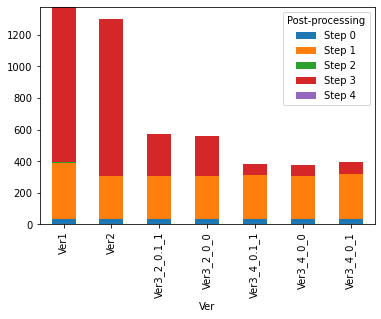

In [4]:
col = ['Ver', 'Post-processing', 'Time']
df = pd.DataFrame(list(Test), columns=col)
pvt_df = df.pivot(index='Ver', columns='Post-processing', values='Time')
pvt_df
pvt_df.plot.bar(stacked=True)

(0.0, 1500.0)

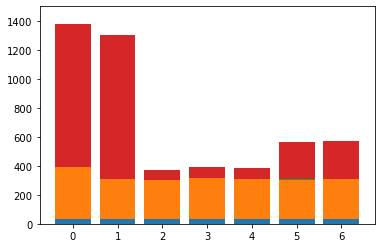

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Bot = [[0 for _ in range(N)] for _ in range(5)]
idx = np.arange(N)

for i in range(4):
    for j in range(N):
        if i == 0:
            Bot[i + 1][j] = Time[i][j]
        else:
            Bot[i + 1][j] = Bot[i][j] + Time[i][j]

plt.bar(idx, Time[0])
plt.bar(idx, Time[1], bottom=Bot[1])
plt.bar(idx, Time[2], bottom=Bot[2])
plt.bar(idx, Time[3], bottom=Bot[3])
plt.bar(idx, Time[4], bottom=Bot[4])
plt.ylim([0, 1500])

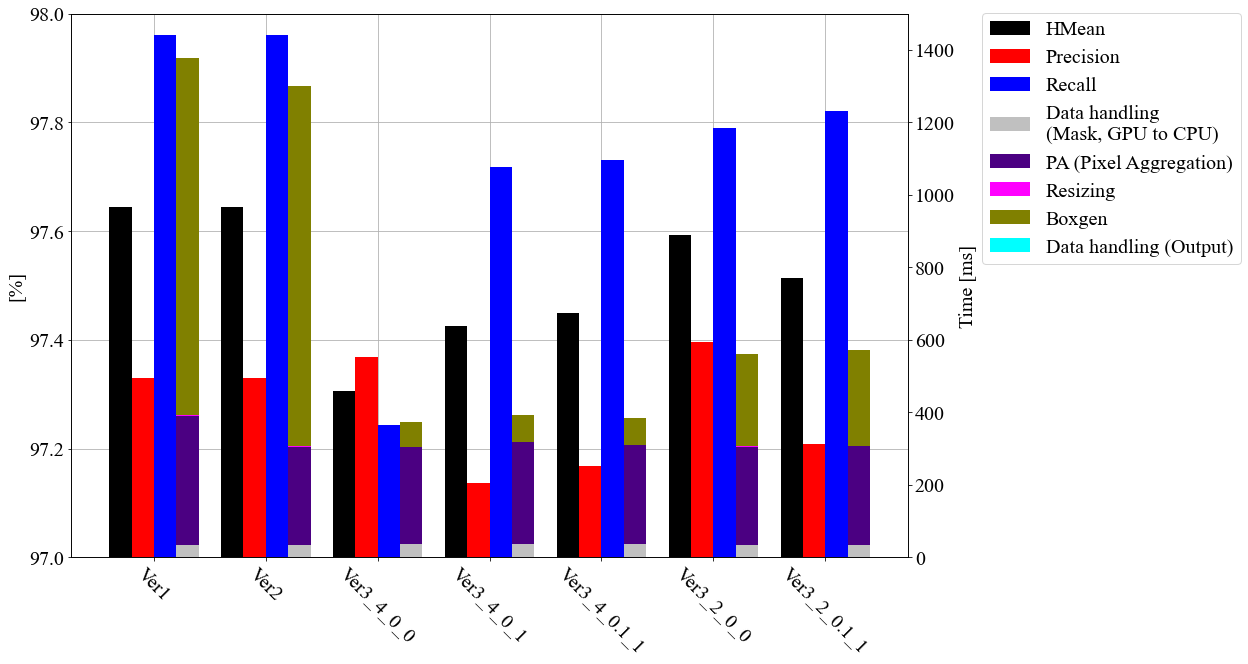

In [6]:
idx = np.arange(N) * 4
bar_width = 0.8

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

fig, ax1 = plt.subplots(figsize=(15, 10))
plt.grid(True)
fig.set_facecolor('white')
b1 = plt.bar(idx, Met[0], bar_width, label='HMean', color='black', zorder=10)
b2 = plt.bar(idx + bar_width, Met[1], bar_width, label='Precision', color='red', zorder=10)
b3 = plt.bar(idx + 2*bar_width, Met[2], bar_width, label='Recall', color='blue', zorder=10)
plt.xticks(idx + 3/2*bar_width, Ver, rotation=-45)
plt.ylabel('[%]')
plt.ylim([97, 98])
ax2 = ax1.twinx()
b4 = ax2.bar(idx + 3*bar_width, Time[0], label='Data handling\n(Mask, GPU to CPU)', color='silver')
b5 = ax2.bar(idx + 3*bar_width, Time[1], bottom=Bot[1], label='PA (Pixel Aggregation)', color='indigo')
b6 = ax2.bar(idx + 3*bar_width, Time[2], bottom=Bot[2], label='Resizing', color='magenta')
b7 = ax2.bar(idx + 3*bar_width, Time[3], bottom=Bot[3], label='Boxgen', color='olive')
b8 = ax2.bar(idx + 3*bar_width, Time[4], bottom=Bot[4], label='Data handling (Output)', color='cyan')
plt.ylim([0, 1500])
plt.ylabel('Time [ms]')
bs = [b1, b2, b3, b4, b5, b6, b7, b8]
labels = [b.get_label() for b in bs]
plt.legend(bs, labels, loc='upper right', bbox_to_anchor=(1.41, 1.02))
plt.savefig('test.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0.3, transparent=False)

In [7]:
def compareIMG(img, cut, *Ver):
    if len(Ver) > 4:
        return
    else:
        fig = plt.figure(figsize=(15, 15))
        for i, j in enumerate(Ver):
            plt.subplot(2,2,i+1)
            tmp = plt.imread('../outputs/' + j + '/' + img + '.jpg')
            plt.imshow(tmp[cut[0]:cut[0]+cut[2],cut[1]:cut[1]+cut[3],:])
            plt.title(j)
            plt.axis('off')

In [8]:
# compareIMG('ABL_HWT_0', [100,100,300,300], 'Ver1', 'Ver3_2_0_0', 'Ver3_2_0.1_1', 'Ver3_4_0.1_1')